## Tarea 11 Septiembre 21 (atrasada)

In [2]:
##Agreguemos primero los paquetes a utilizar

In [3]:
Pkg.add("PyPlot")
Pkg.add("SymPy")

INFO: Package PyPlot is already installed
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Package SymPy is already installed
INFO: METADATA is out-of-date — you may not have the latest version of SymPy
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [53]:
using PyPlot;
plt = PyPlot;
using SymPy;

__Ejercicio 1:__. Implementa el método de Euler en `Julia`. Debe ser de la forma `metodo_euler(f,x0,t0,tf,h)`. No olvide que no debe de utilizar `SymPy` de ningún modo en este ejercicio. Naturalmente la función `f` es de dos variables. El _output_ de la función debe ser `return listt,listx`. Otra forma quizá más inteligente de implementarlo es definir desde antes `listt`, y que los inputs del método sean de la forma: `metodo_euler(f,x0,listt)`, naturalmente en `listt` va el tiempo inicial $t_0$ y el paso $h$ que utilizará el método.

In [26]:
## Definimos primero la función a utilizar

function Metodo_Euler(f,x0,t0,tf,h)
    x=x0
    t=t0
    ## Definimos las listas a utilizar "listt" y "listx", así como las funciones a las que están asociadas x,t
    listt=[]
    listx=[]
    n = round((tf-t0)/h) ## Aplicamos la fórmula de Euler
    for i in 1:n-1
        x += h*f(x,t)
        t += h
        push!(listt,t) ## Limitamos los valores que se tomarán para no saturarse de resultados
        push!(listx,x)
    end
    return listt, listx
end

Metodo_Euler (generic function with 1 method)

* Pruebe su nuevo método resolviendo la ecuación:
$$\frac{dx}{dt}=-\alpha x, x(0)=1\text{ y }2, \text{ y } t\in(0,8).$$
con $\alpha>0$, pruebenlo para $\alpha=2.5$, $h=1.0,0.5,0.2,0.01$.

In [14]:
## Definamos primero una función como se sugiere y evaluémosla en los distintos puntos de h para x(0)=1

In [20]:
f(x)=-2.5x ## Notemos que la derivada de la función no depende de la variable temporal, por eso la función es dependiente sólo de x

f (generic function with 2 methods)

In [28]:
ejemplo1=Metodo_Euler(f,1,0,8,1)

(Any[1, 2, 3, 4, 5, 6, 7], Any[4.1415, 17.152, 71.0351, 294.192, 1218.4, 5045.99, 20897.9])

In [29]:
ejemplo2=Metodo_Euler(f,1,0,8,0.5)

(Any[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5], Any[2.57075, 6.60876, 16.9895, 43.6757, 112.279, 288.642, 742.026, 1907.56, 4903.87, 12606.6, 32408.5, 83314.0, 2.1418e5, 550602.0, 1.41546e6])

In [30]:
ejemplo3=Metodo_Euler(f,1,0,8,0.2)

(Any[0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0  …  6.0, 6.2, 6.4, 6.6, 6.8, 7.0, 7.2, 7.4, 7.6, 7.8], Any[1.6283, 2.65136, 4.31721, 7.02971, 11.4465, 18.6383, 30.3488, 49.4169, 80.4655, 131.022  …  2.24922e6, 3.66241e6, 5.9635e6, 9.71037e6, 1.58114e7, 2.57457e7, 4.19217e7, 6.82612e7, 1.1115e8, 1.80985e8])

In [31]:
ejemplo4=Metodo_Euler(f,1,0,8,0.01)

(Any[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1  …  7.9, 7.91, 7.92, 7.93, 7.94, 7.95, 7.96, 7.97, 7.98, 7.99], Any[1.03141, 1.06382, 1.09724, 1.13171, 1.16726, 1.20393, 1.24175, 1.28076, 1.32099, 1.36249  …  4.09657e10, 4.22526e10, 4.358e10, 4.4949e10, 4.63611e10, 4.78175e10, 4.93197e10, 5.08691e10, 5.24672e10, 5.41154e10])

* Gráfique la solución que obtuvo junto con la curva de la solución exacta, asegúrese de que los puntos de la solución aparezcán unidos en la gráfica para obtener una mejor perspectiva. Haga una gráfica para cada condición inicial, que incluya todos los diferentes pasos usados (excepto $h=1$, este gráfiquelo aparte para cada caso), la idea aquí es ver como nos aproximamos a la solución exacta conforme tomamos $h$'s más pequeños.

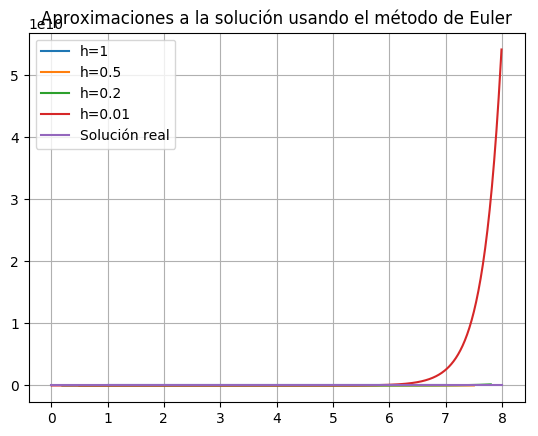

In [44]:
## Graficamos los valores obtenidos para los distintos valores de h
plot(ejemplo1[1],ejemplo1[2],label="h=1")
plot(ejemplo2[1],ejemplo2[2],label="h=0.5")
plot(ejemplo3[1],ejemplo3[2],label="h=0.2")
plot(ejemplo4[1],ejemplo4[2],label="h=0.01")
plot(t,exp.(-2.5*t),label="Solución real")
t=linspace(0,8,50) #Graficamos la solución exacta. Tomamos x(0)= 1.
grid("on")
title("Aproximaciones a la solución usando el método de Euler");


In [45]:
## Cambiemos el domino del resultado de la función para observar lo que sucede en el área de convergencia

plot(ejemplo1[1],ejemplo1[2],label="h=1")
plot(ejemplo2[1],ejemplo2[2],label="h=0.5")
plot(ejemplo3[1],ejemplo3[2],label="h=0.2")
plot(ejemplo4[1],ejemplo4[2],label="h=0.01")
plot(t,exp.(-2.5*t),label="Solución real")
xlim=(-6,9)   ## Por alguna razón no se aplican los cambios a los límites de la gráfica
ylim=(-1,1)
t=linspace(0,8,50) #Graficamos la solución exacta. Tomamos x(0)= 1.
grid("on")
title("Aproximaciones a la solución usando el método de Euler")
show();


### Desacoplamiento de ecuaciones diferenciales de orden 2.

__Ejercicio 2:__. ¿Qué sistema físico está modelado por $\ddot{x} =
-kx$?
* Escriba la solución exacta en terminos de las condiciones iniciales $x(0)$ y $x'(0)$.

A simple vista, uno podría pensar que para resolver este
sistema uno debe desarrollar otro método para encontrar la
solución a la ecuación diferencial del ejercicio pasado. Sin
embargo, esto no es necesario.

El sistéma físico que modela la ecuación $\ddot{x}=-kx$ es el oscilador armónico simple, donde $k$ es una constante positiva.

Dada la forma de la ecuación diferencial de $2^{do}$ orden, podemos proponer la solución de la forma:

$$x(t)=Ae^{i\sqrt{k}t}+Be^{-i\sqrt{k}t}$$

O bien, en términos de senos y cosenos:

$$\Rightarrow x(t) = Acos\left(\sqrt{k} t\right) + Bsen\left(\sqrt{k} t\right)$$

Ahora:
$$ x'(0)=-A\sqrt{k}sen\left(\sqrt{k}t \right) + B\sqrt{k}cos\left(\sqrt{k}t \right) $$

Aplicando las condiciones iniciales:

$$ x(0)=A $$
$$ x'(0)=\sqrt{k}B $$


$$ \therefore \quad x(t) = Acos\left(\sqrt{k} t\right) + B\sqrt{k}sen\left(\sqrt{k} t\right) $$

__Ejercicio 3:__. Haz $u = \dot{x}(t)$ y calcula la derivada de
$u$ ¿qué obtienes y como se relaciona con el sistema
original?

Si llevaste a cabo el ejercicio anterior, te darás cuenta
que terminas con un sistema acoplado de ecuaciones
diferenciales:

$$
\dot{u} = -kx, \dot{x} = u,
$$

Con este sistema acoplado puedes utilizar el método de
Euler en su forma vectorial:
$$\frac{d\vec x}{dt}=\vec f(\vec x,t),$$
donde $\vec x=(x,u)$, y para este caso es facil ver que $\vec f(\vec x,t)=(u,-kx).$

Si $u = x'(t)$ $\rightarrow$ $u'(t) = x''(t) + k$. Donde $k$ es una constante
Lo cual nos indica que la ecuación original debe cumplir:


* $u(t) = x'(t)$
* $u'(t) = -kx(t)$


__Ejercicio 4:__. Obten la solución del sistema $\ddot{x} = -kx(t)$
utilizando lo escrito arriba y el método de Euler.

* Para utilizar el método de Euler, impleméntelo para sistemas de más de una dimensión.

__Ejercicio 5:__ Aplicar el método de Euler para resolver la ecuación:
$$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$
Compare su respuesta con la solución exacta: $4+8t-5t^2$

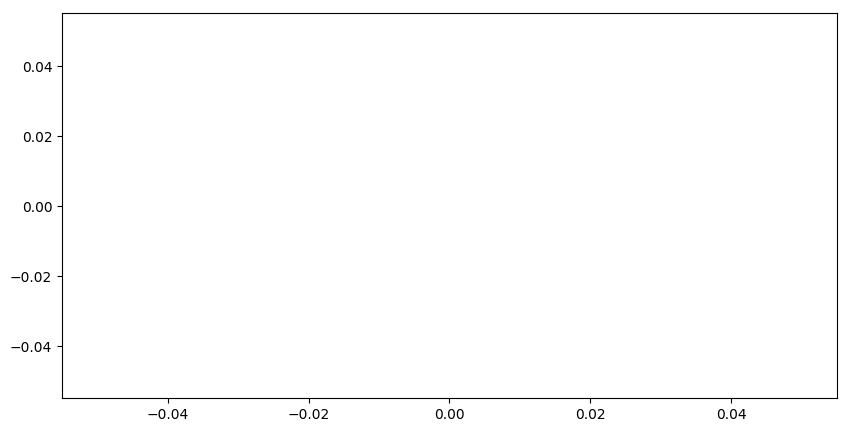

0-element Array{Any,1}

In [54]:
T,X=Metodo_Euler((x,t)->(2x-18t)/(1+t),-1,0,8,800)
F=[]
for i in T
    push!(F,4+8i-5i^2)
end
plt.figure(figsize=(10,5))
plt.scatter(T,X)
plt.scatter(T,F)
F-T #Error conforme aumenta t